<a href="https://colab.research.google.com/github/Anchaliya75/Pancreas-Cancer/blob/main/pancreatic_cancer_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 349 kB 5.3 MB/s 
     |████████████████████████████████| 68 kB 4.0 MB/s 
     |████████████████████████████████| 38.1 MB 1.4 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=3b156b3d870bcd5692abad786e477a0604419601656a93c0c28e7b90fa87016a
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.

In [2]:
# Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns



In [3]:
df =pd.read_csv('/content/mmc1tabS1a-202204281228 (2).csv')

In [4]:
df.drop(columns=['Case'],axis =0,inplace =True)# Removing the Case Column as it will be of no use

In [5]:
df.head()  # Looking at data

,Dx.Age,Dx.Date,Dx.SzPrim.cm,Dx.WasPrimExcis,Dx.SzMetsLargest.cm,Dx.SzMetsRange.cm,RPP.remark,RPP.Date,RPP.SzPanc.cm,MR.remark,...,Aut.Panc,Aut.SzReTumorPanc,Aut.SzPrim.cm,Aut.MetsBurden,Aut.MeanSzMets.cm,Aut.SzMetsRange.cm,Aut.minSzMetsRange.cm,Aut.maxSzMetsRange.cm,timeline,result
0,84,05-05-1995,6.0,No,NaN,x,no data,NaN,NaN,no data,...,Present (Not Resected),NaN,6.0,000to10,1.0,0.5-2.8,0.5,2.8,174,1
1,62,16-12-2002,3.0,No,2.0,01-Feb,Yes,27-01-2003,7.0,"Yes, increase in size and number in liver",...,Present (Not Resected),NaN,4.0,100sto1000s,0.3,0.2-2,0.2,2.0,161,1
2,67,25-07-2002,2.0,No,2.0,01-Feb,Yes,12-05-2003,4.0,Yes,...,Present (Not Resected),NaN,4.0,011to100,3.0,1.0-5.0,1.0,5.0,334,1
3,47,02-12-2002,5.0,No,NaN,x,No,NaN,NaN,No,...,Present (Not Resected),NaN,5.0,000to10,NaN,NaN,NaN,NaN,256,1
4,57,15-01-2003,4.0,No,1.0,0.3-1,No,NaN,NaN,No,...,Present (Not Resected),NaN,5.0,100sto1000s,0.5,0.2-2.0,0.2,2.0,229,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Dx.Age                 101 non-null    int64  
 1   Dx.Date                101 non-null    object 
 2   Dx.SzPrim.cm           101 non-null    float64
 3   Dx.WasPrimExcis        101 non-null    object 
 4   Dx.SzMetsLargest.cm    36 non-null     float64
 5   Dx.SzMetsRange.cm      100 non-null    object 
 6   RPP.remark             101 non-null    object 
 7   RPP.Date               44 non-null     object 
 8   RPP.SzPanc.cm          40 non-null     float64
 9   MR.remark              97 non-null     object 
 10  MR.Date                44 non-null     object 
 11  MR.SzMetsLargest.cm    41 non-null     float64
 12  MP.remark              97 non-null     object 
 13  MP.Date                26 non-null     object 
 14  MP.SzMetsLargest.cm    26 non-null     float64
 15  Aut.Da



*   More than 50 % missing value are there in Recurrence(Size,Date) and Metastatic Sub column(progression,remark,Date)




In [7]:
df.describe()

,Dx.Age,Dx.SzPrim.cm,Dx.SzMetsLargest.cm,RPP.SzPanc.cm,MR.SzMetsLargest.cm,MP.SzMetsLargest.cm,Aut.SzReTumorPanc,Aut.SzPrim.cm,Aut.MeanSzMets.cm,Aut.minSzMetsRange.cm,Aut.maxSzMetsRange.cm,timeline,result
count,101.000000,101.000000,36.000000,40.000000,41.000000,26.000000,20.000000,75.000000,84.000000,83.000000,83.000000,101.000000,101.0
mean,63.554455,3.736634,2.458333,3.862500,1.826098,3.726923,3.520000,5.309333,1.332143,0.559036,3.236145,503.287129,1.0
std,11.398662,1.420333,2.361280,1.923897,1.913642,3.345511,1.972869,2.416843,0.947433,0.483644,2.466931,462.897707,0.0
min,36.000000,1.500000,0.200000,1.000000,0.300000,0.800000,0.000000,0.000000,0.200000,0.100000,0.500000,17.000000,1.0
25%,55.000000,2.800000,1.000000,2.525000,0.800000,1.625000,2.300000,4.000000,0.775000,0.200000,2.000000,186.000000,1.0
50%,64.000000,3.500000,2.000000,3.400000,1.000000,2.850000,3.500000,5.000000,1.000000,0.500000,2.500000,347.000000,1.0
75%,71.000000,4.200000,3.100000,4.775000,2.000000,4.550000,5.000000,6.000000,1.500000,0.600000,4.000000,741.000000,1.0
max,90.000000,8.000000,13.600000,11.000000,9.500000,14.000000,7.000000,15.000000,6.000000,3.500000,14.000000,2841.000000,1.0


 

*   Median Age of Patient is 60 year in dataset
*   Min Tumor size at Diagonistic is 1.5 and max is 8 cm,median size is 3.5cm
*  Size of largest Metastatic tumor is 36cm and median is 2.0cm
* Median Survival(Difference between Diagonistic and Autopsy Date is 347 days



In [8]:
df['Dx.Age']=(df['Dx.Age']//10)*10 # Converting Age of Patients to 10s 20s 30s and so on for better analysis

In [10]:
df['Dx.WasPrimExcis']=df['Dx.WasPrimExcis'].map({"No":0,"Yes":1},na_action='ignore')# Converting datatype from object to
#int

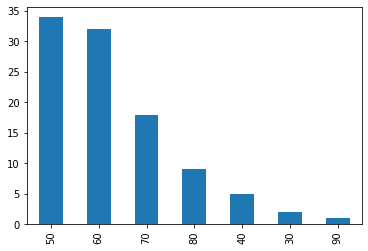

In [9]:
df['Dx.Age'].value_counts().plot.bar() # x-axis represents age(10s,20's,30's and so on) y-axis represents count
plt.show()

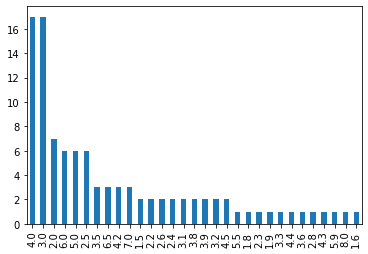

In [11]:
df['Dx.SzPrim.cm'].value_counts().plot.bar() # x -axis represents tumor size in cm and y axis represents count

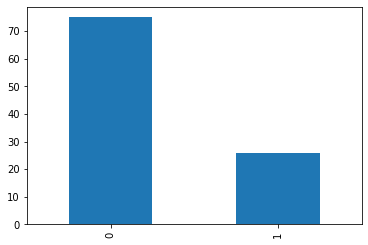

In [12]:
df['Dx.WasPrimExcis'].value_counts().plot.bar()# x-axis represents two things(0:-> Primary tumor is not surgically removed)
#Primary tumor is surgically removed

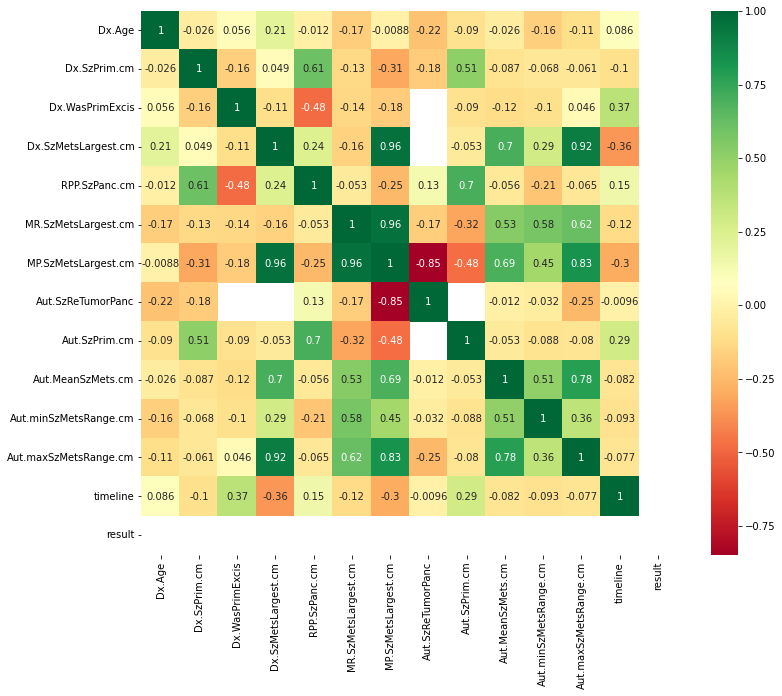

In [13]:
plt.figure(figsize=(12,10))
p=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")#Correlation with features and labels



*  Timeline(label) has correlation of 0.39 with DxwasPrimExcis (Rest also have high correlation but they are iether from autopsy or with those columns which have high missing values Autopsy columns have less use for us right now as we want to predict survival



In [14]:
df_survival=df['timeline']

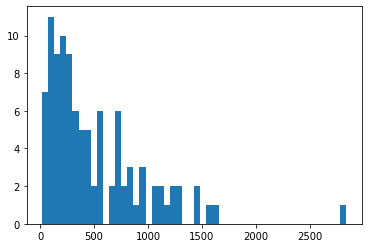

In [15]:
plt.hist(df_survival,bins=50)
plt.show()
# heavily right skewed Data 
# Why is this a Problem Outliers have a lot of impact in Regression model accuracy 
# ==================== what does histogram represents?
#In a histogram, the total range of data set (i.e from minimum value to maximum value) is divided into 8 to 15 equal parts. 
#These equal parts are known as bins or class intervals.
#======================Histogram xand y value representation===========
#Each and every observation (or value) in the data set is placed in the appropriate bin. 
#The number of observations occupying a given bin, becomes the frequency of that bin.

In [17]:
from lifelines import KaplanMeierFitter


([<matplotlib.axis.YTick at 0x7f5a8f597910>,
 <a list of 40 Text major ticklabel objects>)

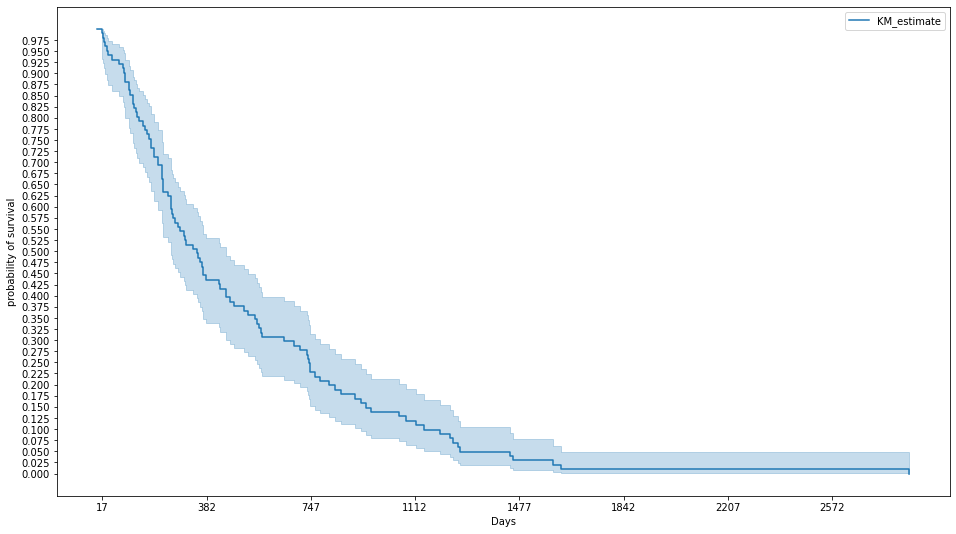

In [18]:
fig = plt.figure(figsize=(16,9))
kmf = KaplanMeierFitter()
kmf.fit(durations = df['timeline'], event_observed = df['result'])
kmf.plot_survival_function()
plt.ylabel('probability of survival')
plt.xlabel('Days')
plt.plot(figsize=(16,9))
plt.xticks(np.arange(min(df['timeline']), max(df['timeline']), 365))
plt.yticks(np.arange(0.0,1.0, 0.025))



*   3 Year Survival rate is 12.5%
*   5 year Survival Rat is 5%



In [19]:
df_effects_of_Primary_surgery_diagonistics=df[["Dx.WasPrimExcis","timeline"]]

In [20]:
df_effects_of_Primary_surgery_diagonistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Dx.WasPrimExcis  101 non-null    int64
 1   timeline         101 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [21]:
T=df['timeline']
E=df['result']

Text(0.5, 0, 'Days')

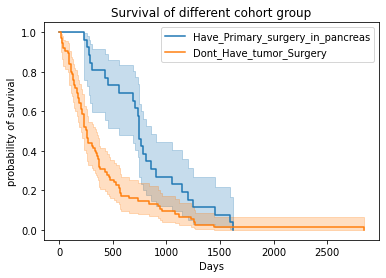

In [22]:
ax = plt.subplot(111)

m = (df["Dx.WasPrimExcis"] == True)
kmf.fit(T[m], event_observed = E[m], label = "Have_Primary_surgery_in_pancreas")
kmf.plot_survival_function(ax = ax,)
kmf.fit(T[~m], event_observed = E[~m], label = "Dont_Have_tumor_Surgery")
kmf.plot_survival_function(ax = ax,at_risk_counts = False)
plt.title("Survival of different cohort group")
plt.ylabel('probability of survival')
plt.xlabel('Days')

In [23]:
from lifelines.statistics import logrank_test
results = logrank_test(T[m], T[~m], event_observed_A=E[m], event_observed_B=E[~m])
print(results.p_value) 
#Have done Logrank test to actually find our results are statistically significant or not?
# P value less tha 0.05 clearly show the result are statistically significant       

0.0007551871170478607


 **Survival Rate is higher for those whose Primary Tumor is removed via surgery**

# # Cox Proportional Hazard Model


In [24]:
from lifelines import CoxPHFitter

In [26]:
df_cox=df[['Dx.Age' ,  'Dx.SzPrim.cm'  ,'Dx.WasPrimExcis' ,'timeline' , 'result']]

In [27]:
cph = CoxPHFitter()
cph.fit(df_cox, duration_col = 'timeline', event_col = 'result')

cph.print_summary() 

<lifelines.CoxPHFitter: fitted with 101 total observations, 0 right-censored observations>
             duration col = 'timeline'
                event col = 'result'
      baseline estimation = breslow
   number of observations = 101
number of events observed = 101
   partial log-likelihood = -362.26
         time fit was run = 2022-05-27 14:43:00 UTC

---
                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                               
Dx.Age           -0.00       1.00       0.01            -0.02             0.01                 0.98                 1.01
Dx.SzPrim.cm      0.01       1.01       0.07            -0.12             0.14                 0.89                 1.15
Dx.WasPrimExcis  -0.74       0.48       0.24            -1.21            -0.27                 0.30                 0.76

                  cmp to     z      p   -log2(p)
covariate                                       
Dx.Age              0.00 -0.42   0.68       0.56
Dx.SzPrim.cm        0.00  0.18   0.86       0.22
Dx.WasPrimExcis     0.00 -3.09 <0.005       8.95
---
Concordance = 0.61
Partial AIC = 730.52
log-likelihood ratio test = 12.19 on 3 df
-log2(p) of ll-ratio test = 7.21

Dx.SzPrim.cm has a coefficient of about 0.01.
We can recall that in the Cox proportional hazard model, a higher hazard means more at risk of the event occurring. The value exp(0.01) is called the hazard ratio
Here, a one unit increase in Dx.SzPrim.cm means the baseline hazard will increase by a factor of exp(0.01)= 1.01 -> about a 1% increase


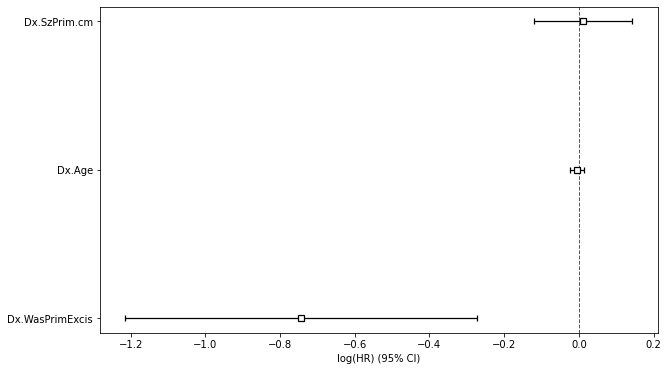

In [28]:
plt.subplots(figsize=(10, 6))
cph.plot()
# PLOTTING THE DIFFERENT COEEFIENT IN TERMS OF LOG HAZARD

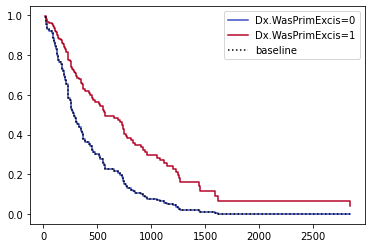

In [29]:
# plot the servival function for different covarient for ex. for diff age value
cph.plot_partial_effects_on_outcome(covariates = 'Dx.WasPrimExcis',
                                    values = [0,1],
                                    cmap = 'coolwarm')

In [30]:
cph.check_assumptions(df_cox, p_value_threshold = 0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



/usr/local/lib/python3.7/dist-packages/lifelines/fitters/mixins.py:108: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  for variable in self.params_.index & (columns or self.params_.index):


<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 101 total observations, 0 right-censored observations>
         test_name = proportional_hazard_test

---
                      test_statistic      p  -log2(p)
Dx.Age          km              5.13   0.02      5.41
                rank            5.10   0.02      5.39
Dx.SzPrim.cm    km              4.54   0.03      4.92
                rank            4.55   0.03      4.92
Dx.WasPrimExcis km              8.46 <0.005      8.10
                rank            8.48 <0.005      8.12



1. Variable 'Dx.Age' failed the non-proportional test: p-value is 0.0235.

   Advice 1: the functional form of the variable 'Dx.Age' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'Dx.Age' using pd.cut, and then specify it in
`strata=['Dx.Age', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'Dx.SzPrim.cm' failed the non-proportional test: p-value is 0.0330.

   Advice 1: the functional form of the variable 'Dx.SzPrim.cm' might be incorrect. That is, there
may be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional

[]

# Weibull  Parametric Model


In [31]:
# Weibull Model Parametric Model
from lifelines import WeibullFitter,\
                      ExponentialFitter,\
                      LogNormalFitter,\
                      LogLogisticFitter


# Instantiate each fitter
wb = WeibullFitter()
ex = ExponentialFitter()
log = LogNormalFitter()
loglogis = LogLogisticFitter()

# Fit to data
for model in [wb, ex, log, loglogis]:
  model.fit(durations = df_cox["timeline"],
            event_observed = df_cox["result"])
  # Print AIC
  print("The AIC value for", model.__class__.__name__, "is", model.AIC_)

  # lower the AIC value better will be the model
  

The AIC value for WeibullFitter is 1460.0054689927233
The AIC value for ExponentialFitter is 1460.6744896129435
The AIC value for LogNormalFitter is 1466.1621335907662
The AIC value for LogLogisticFitter is 1466.2825956415645


In [32]:
from lifelines import WeibullAFTFitter
weibull_aft = WeibullAFTFitter()
weibull_aft.fit(df_cox, duration_col='timeline', event_col='result')

weibull_aft.print_summary()
# exp(coeff) is accelaration factor sometimes called as time ratio

<lifelines.WeibullAFTFitter: fitted with 101 total observations, 0 right-censored observations>
             duration col = 'timeline'
                event col = 'result'
   number of observations = 101
number of events observed = 101
           log-likelihood = -722.22
         time fit was run = 2022-05-27 14:48:25 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                               
lambda_ Dx.Age            0.00       1.00       0.01            -0.01             0.02                 0.99                 1.02
        Dx.SzPrim.cm      0.01       1.01       0.06            -0.10             0.12                 0.90                 1.12
        Dx.WasPrimExcis   0.61       1.84       0.20             0.21             1.00                 1.24                 2.73
        Intercept         5.77     320.29       0.51             4.78             6.76               118.64               864.66
rho_    Intercept         0.16       1.18       0.07             0.02             0.31                 1.02                 1.37

                          cmp to     z      p   -log2(p)
param   covariate                                       
lambda_ Dx.Age              0.00  0.61   0.54       0.88
        Dx.SzPrim.cm        0.00  0.11   0.91       0.14
        Dx.WasPrimExcis     0.00  3.01 <0.005       8.60
        Intercept           0.00 11.39 <0.005      97.36
rho_    Intercept           0.00  2.20   0.03       5.18
---
Concordance = 0.58
AIC = 1454.43
log-likelihood ratio test = 11.57 on 3 df
-log2(p) of ll-ratio test = 6.80

In [33]:
print(weibull_aft.median_survival_time_)
print(weibull_aft.mean_survival_time_)

320.60856660648767
413.4163982549553


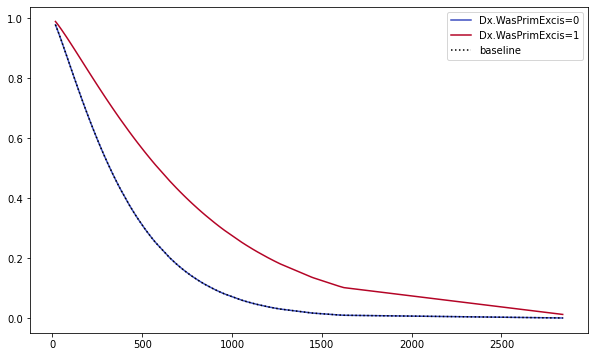

In [34]:
plt.subplots(figsize=(10, 6))
weibull_aft.plot_partial_effects_on_outcome('Dx.WasPrimExcis',[0,1], cmap='coolwarm')


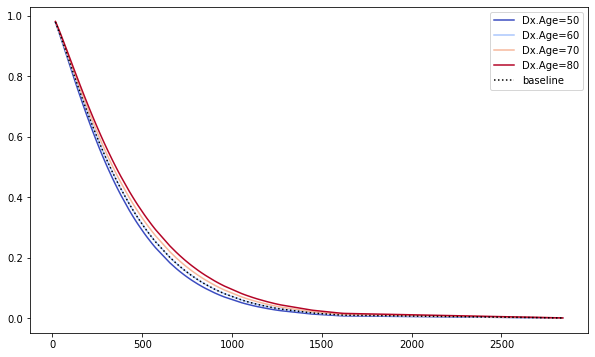

In [35]:
plt.subplots(figsize=(10, 6))
weibull_aft.plot_partial_effects_on_outcome('Dx.Age',[50,60,70,80], cmap='coolwarm')
